# Accessing and Opening All of The Dataset Files to be ready to be Processed

In [4]:
import pandas as pd
import numpy as np
import os
import os.path
import re
from pathlib import Path
import sys
from distutils.dir_util import copy_tree
%run high_pass_filter.ipynb #import the class file of the filter which you want to use


In [16]:
class ProcessableDataset:
    _script_path = Path().absolute() #location of our script
    _dataset_folder_name = 'Emotion_Dataframes'
    _new_folder_name = "Filtered_Dataframes"
    _dataset_folder_path = os.path.join(str(_script_path), _dataset_folder_name)
    _new_folder_path = os.path.join(str(_script_path), _new_folder_name)
    _file_names = []
    _folder_locations = []
    _dataset_list = [] 
    
    filt = HighPassFilter()
    
    
    def list_all_files(self):
        for dirpath, dirnames, filenames in os.walk(self._dataset_folder_path):
            for filename in [f for f in filenames if f.endswith(".csv")]:
                location = os.path.join(dirpath, filename)
                self._folder_locations.append(location)
                self._file_names.append(filename)
                
    def load_datasets(self):
        for location in self._folder_locations:
            self._dataset_list.append(pd.read_csv(location))
            
    
    def apply_filter(self):
        #edit this method to implement your own filter
        filtered_dataset_list = []        
        fs = 290
        if self._dataset_list:
            for data in self._dataset_list:
                header_data,y = self.filt.extract_column(data,"ecg")
                result = self.filt.highpass_filter(header_data,fs)
                filtered_dataset_list.append(result)
        return filtered_dataset_list
    
                    
    def create_new_folder(self):
        copy_tree(self._dataset_folder_path, self._new_folder_path)
                    
    def print_file_names(self):
        
        if not self.file_names:
            print("There are no file name recorded, the list is empty! Did you forget to run \"load_datasets\" method?")
        else:
            [print(name) for name in self.file_names]
            
    def plot_dataset(self):
        data = self._dataset_list[0]
        x_axis,y_axis = self.filt.extract_column(data, "ecg")
        filtered_data_list = self.apply_filter()
        filtered_data = filtered_data_list[0]
        self.filt.plot_dataset("ecg", filtered_data,x_axis,y_axis)
        
        
            
                    
            

                
        
        

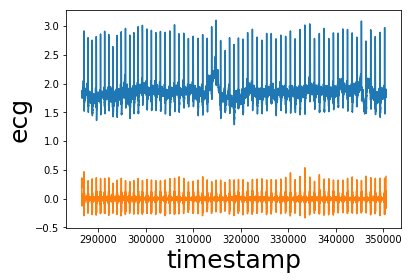

In [17]:
obj = ProcessableDataset()
obj.list_all_files()
obj.load_datasets()
obj.plot_dataset()



